## <font color='green'>Project Introduction</font>

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016) between Mission IV and Mission V.

For each dataset, the fields are:

A row number (1-n) useful in sorting this export's results The UNIX time_t date (seconds since Jan 1, 1970). Useful in sorting this export's results with other export's results The date in yyyy-mm-dd format The local time of day in hh:mm:ss 24-hour format The numeric data, if any (may be an empty string) The text data, if any (may be an empty string)

The units of each dataset are:

- Solar radiation: watts per meter^2
- Temperature: degrees Fahrenheit
- Humidity: percent
- Barometric pressure: Hg
- Wind direction: degrees
- Wind speed: miles per hour
- Sunrise/sunset: Hawaii time

Link: https://www.kaggle.com/datasets/dronio/SolarEnergy

## <font color='green'>Importing Libraries</font>

In [2]:
#ignore warning
import warnings
warnings.filterwarnings("ignore")

#Standard Libraries
import pandas as pd
import numpy as np
import re

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
#!pip install seaborn
import seaborn as sns

#data transformation
from scipy import stats

#preprcossing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#deep learning lib
from keras.layers import Dense, Dropout,Activation
from keras.optimizers import SGD,Adam
from keras.models import Sequential

from collections import Counter

#model evalulation
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error



## <font color='green'>Loading Data</font>

In [3]:
data = pd.read_csv('/kaggle/input/SolarEnergy/SolarPrediction.csv')

In [4]:
data.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


## <font color='green'>Data Wrangling</font>

In [6]:
df = data.copy()

In [7]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [ ]:
df.head()

In [8]:
#extracting month,day from data
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['Day'] = pd.to_datetime(df['Data']).dt.day

#extracting hout, min,sec from data
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second


In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [10]:
#seprating hours and min from sunrise and sunset
df['riseHour'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['riseMin'] = pd.to_datetime(df['TimeSunRise']).dt.minute

df['setHour'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['setMin'] = pd.to_datetime(df['TimeSunSet']).dt.minute

df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,riseHour,riseMin,setHour,setMin
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int32  
 12  Day                     32686 non-null  int32  
 13  Hour                    32686 non-null  int32  
 14  Minute                  32686 non-null

In [12]:
df.drop(columns = ['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)

In [13]:
sum(df.isnull().sum())

0

In [14]:
X = df.drop(['Radiation'],axis=1)
y = df['Radiation']

## <font color='green'>Feature Selection</font>

### Correralation Matrix

In [15]:
corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMin,setHour,setMin
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


Text(0.5, 1.0, 'Correlation matrix')

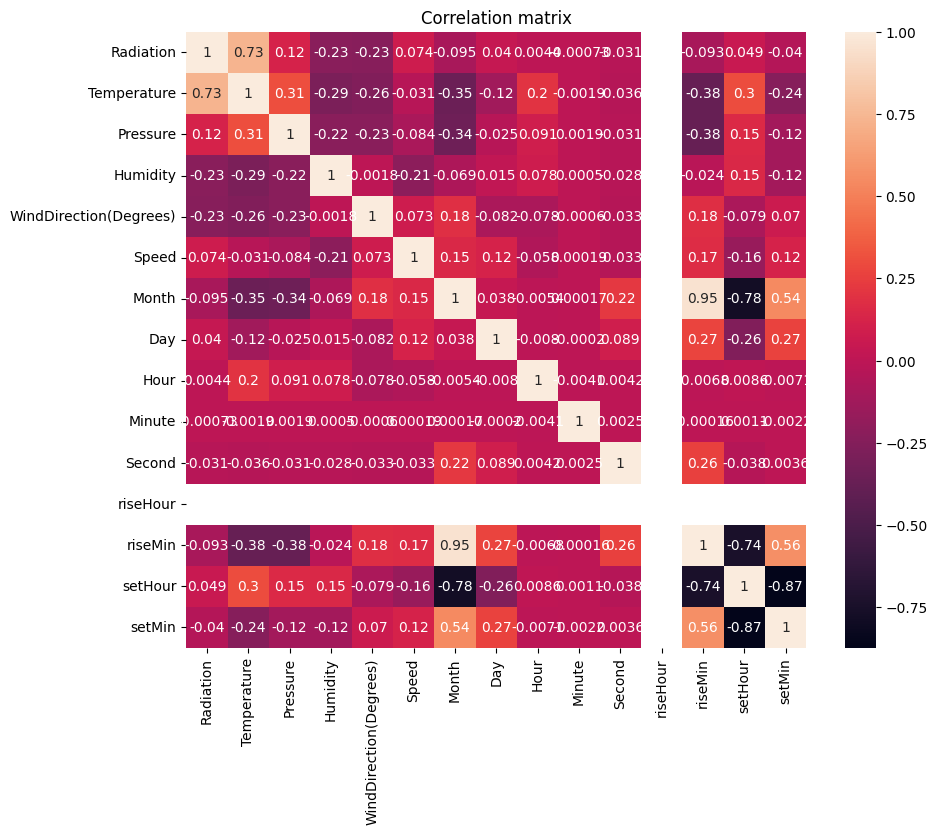

In [16]:
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation matrix')

By this visualization we can see that hour and minute of the day has very low correlation with the radiance feature. Which usually is not a correct assumption. As the radiation of the day should depend on the time of day. 

Thus we will try to visualize this with different method

### Select Kbest Method

In [17]:
bestfeature = SelectKBest(score_func= chi2,k=10)

In [18]:
#converting to labels
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
train_y =label_encode.fit_transform(y)

In [19]:
train_y

array([ 9,  9, 11, ...,  8, 11,  8])

In [20]:
y_cont = df['Radiation'].apply(lambda x: int(x*100))

In [21]:
#scaling X 
X_scaled = MinMaxScaler().fit_transform(X)
fit = bestfeature.fit(X_scaled,y_cont)

In [22]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(X.columns)
feature_score = pd.concat([column,scores], axis = 1)

In [23]:
feature_score.columns = ['feature','feature_score']

In [24]:
feature_score

,feature,feature_score
0,Temperature,1651.685632
1,Pressure,523.791060
2,Humidity,1588.087433
3,WindDirection(Degrees),3271.827277
4,Speed,765.859779
5,Month,4684.579610
6,Day,2841.926850
7,Hour,691.185393
8,Minute,2702.449333
9,Second,2288.673032


In [25]:
feature_score.sort_values(by = 'feature_score',ascending=False,inplace = True)

In [26]:
feature_score

,feature,feature_score
12,setHour,12207.531454
5,Month,4684.579610
11,riseMin,4015.062771
3,WindDirection(Degrees),3271.827277
6,Day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,setMin,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


We can see that this intiutations are more robust, As time of the day has more score. The higher the score the more correaleted the feature is

Text(0.5, 1.0, 'Feature selection with SelectKBest model')

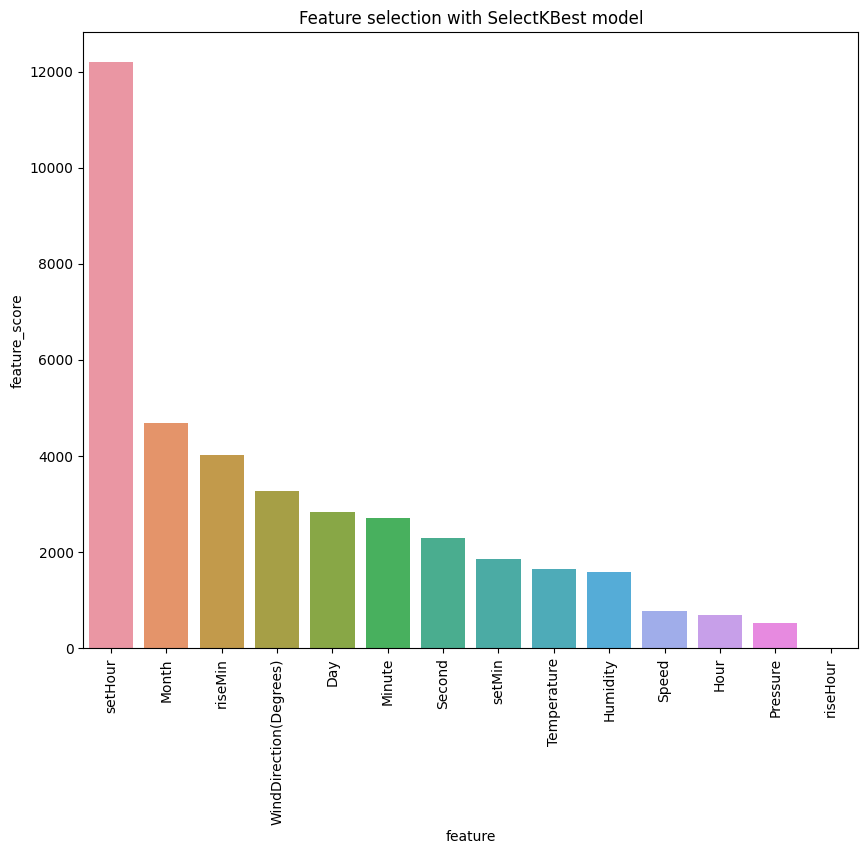

In [27]:
sns.barplot(x=feature_score.feature,y=feature_score.feature_score)
plt.xticks(rotation =90)
plt.title('Feature selection with SelectKBest model')

### Extra Tree Classifier

In [28]:
model = ExtraTreesClassifier(n_estimators=10,
                             verbose= 2)
model.fit(X_scaled,y_cont)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


ExtraTreesClassifier(n_estimators=10, verbose=2)

In [29]:
feature_imp = pd.DataFrame(model.feature_importances_,
                           index=X.columns,
                          columns = ['Feature_importance'])
feature_imp.sort_values(by='Feature_importance',ascending=False,inplace = True)
feature_imp

,Feature_importance
WindDirection(Degrees),0.159938
Minute,0.150109
Speed,0.124953
Second,0.123281
Humidity,0.108971
Hour,0.090335
Temperature,0.082104
Pressure,0.076430
Day,0.034108
setMin,0.023312


Text(0.5, 1.0, 'Feature selection with Extra Tree Classifier model')

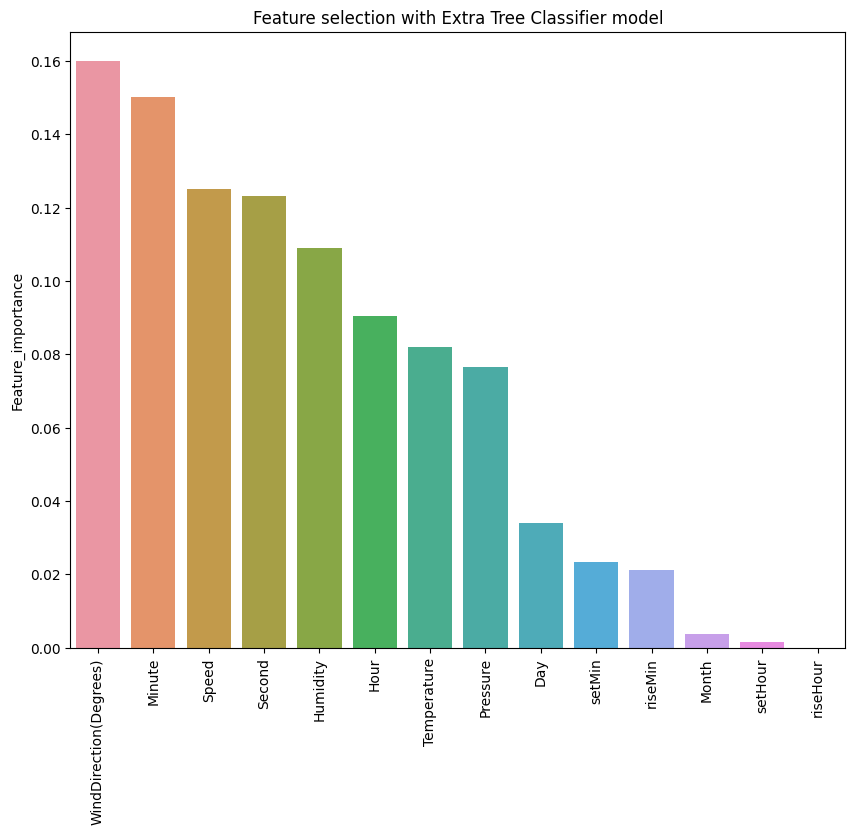

In [30]:
sns.barplot(x=feature_imp.index,y=feature_imp.Feature_importance)
plt.xticks(rotation =90)
plt.title('Feature selection with Extra Tree Classifier model')

## <font color = 'green'>Feature Engineering</font>

In [31]:
X.columns

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'riseHour',
       'riseMin', 'setHour', 'setMin'],
      dtype='object')

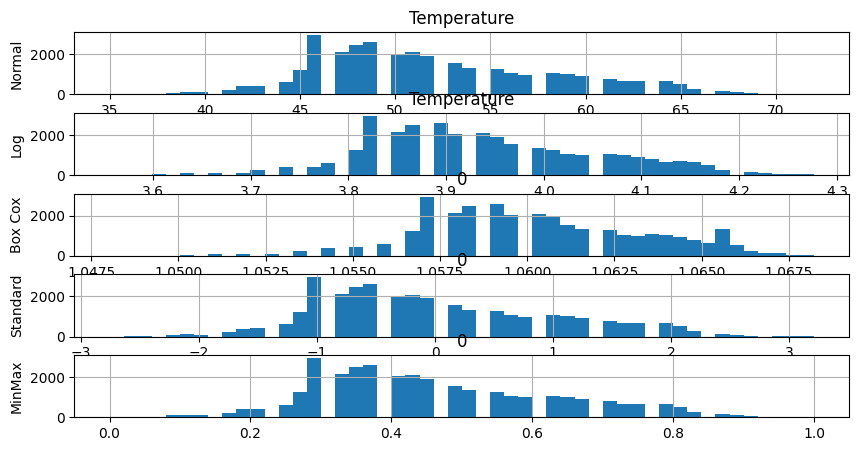

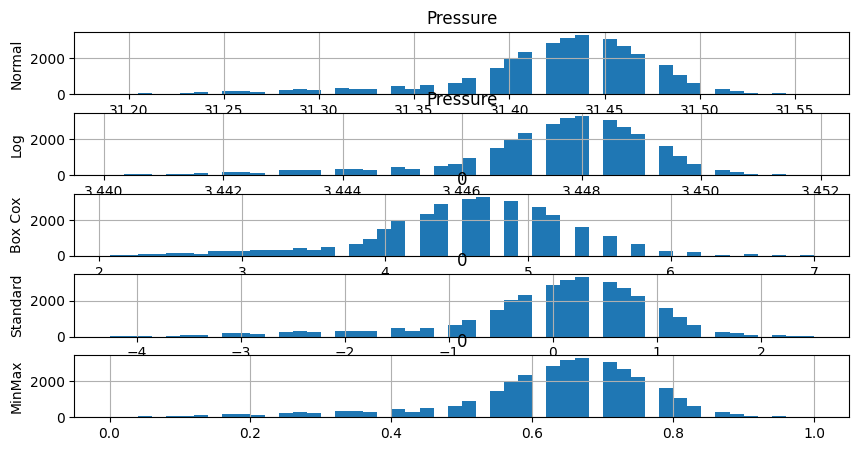

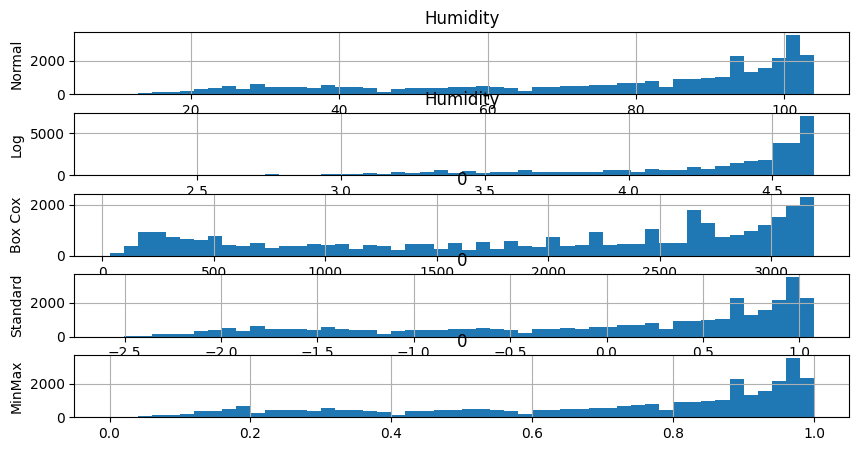

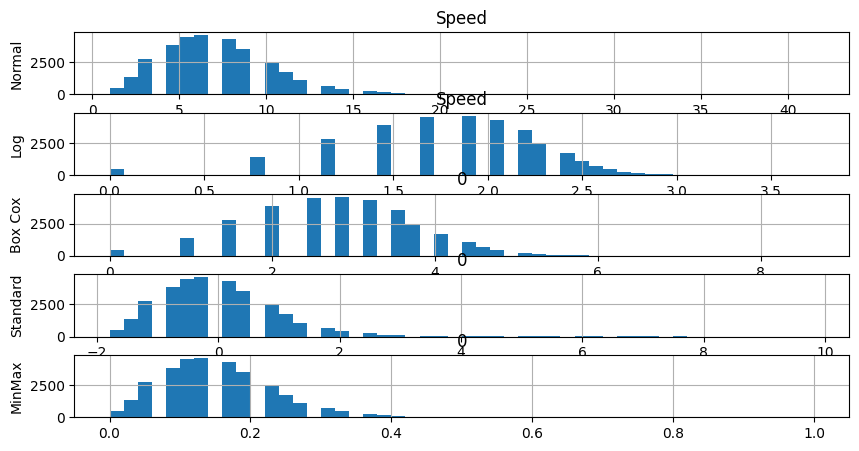

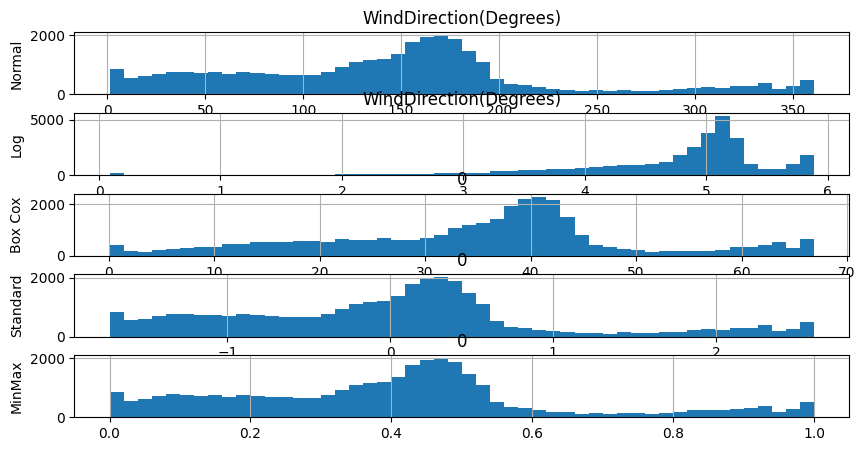

In [32]:
feature_to_transform = ['Temperature', 'Pressure', 'Humidity','Speed', 'WindDirection(Degrees)']
for feature in feature_to_transform:
    fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize = (10,5))
    pd.DataFrame(X[feature]+1).hist(ax=ax1,bins=50)
    pd.DataFrame((X[feature]+1).transform(np.log)).hist(ax=ax2,bins=50)
    
    pd.DataFrame(stats.boxcox(X[feature]+1)[0]).hist(ax=ax3,bins=50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(X[feature]+1).reshape(-1,1))).hist(ax=ax4,bins=50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(X[feature]+1).reshape(-1,1))).hist(ax=ax5,bins=50)

    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [33]:
X_new = X.copy()
transform = {'Temperature' : (X['Temperature']+1).transform(np.log), 
    'Pressure':stats.boxcox(X['Pressure']+1)[0] ,
    'Humidity':stats.boxcox(X['Humidity']+1)[0], 
    'Speed': (X['Speed']+1).transform(np.log),
    'WindDirection(Degrees)': MinMaxScaler().fit_transform(
                np.array(X['WindDirection(Degrees)']+1).reshape(-1, 1))
}
for i in transform:
    X_new[i] = transform[i]

In [34]:
X_new.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,riseHour,riseMin,setHour,setMin
0,3.89182,5.044903e+152,1139.358507,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046828,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253399,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187326,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392038,0.291391,1.890095,9,29,23,35,24,6,13,18,13


In [35]:
X_new.isnull().sum()

Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
Day                       0
Hour                      0
Minute                    0
Second                    0
riseHour                  0
riseMin                   0
setHour                   0
setMin                    0
dtype: int64

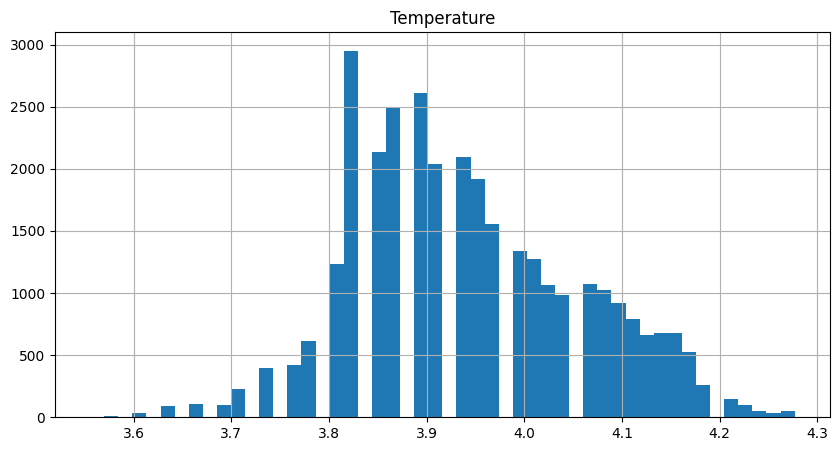

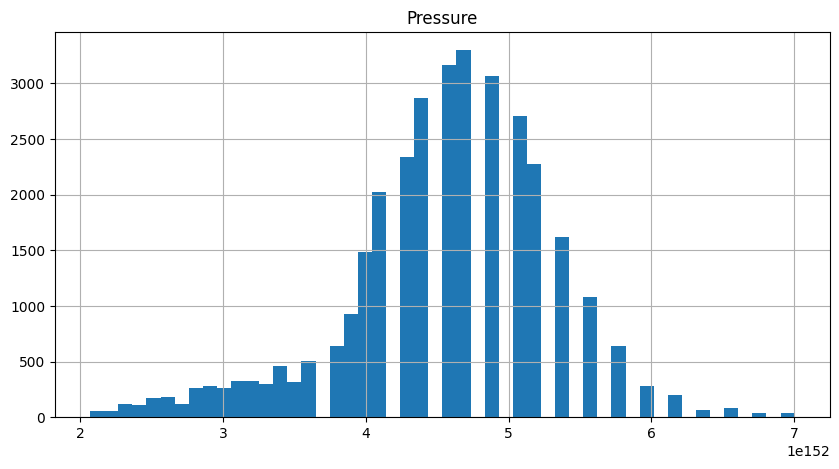

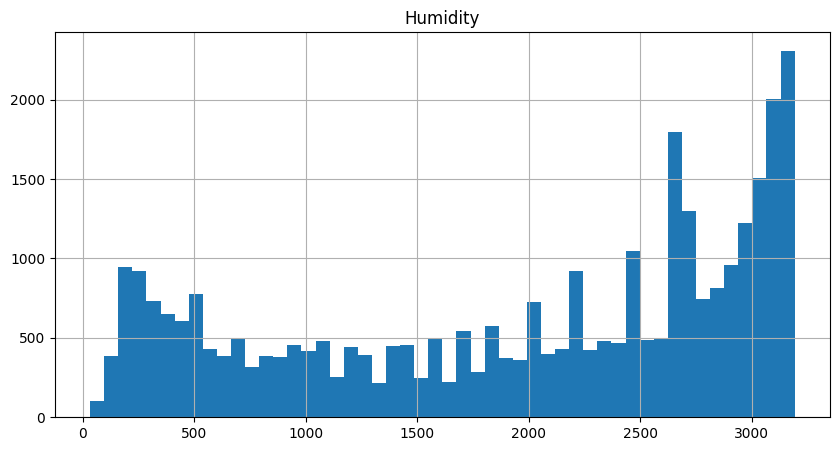

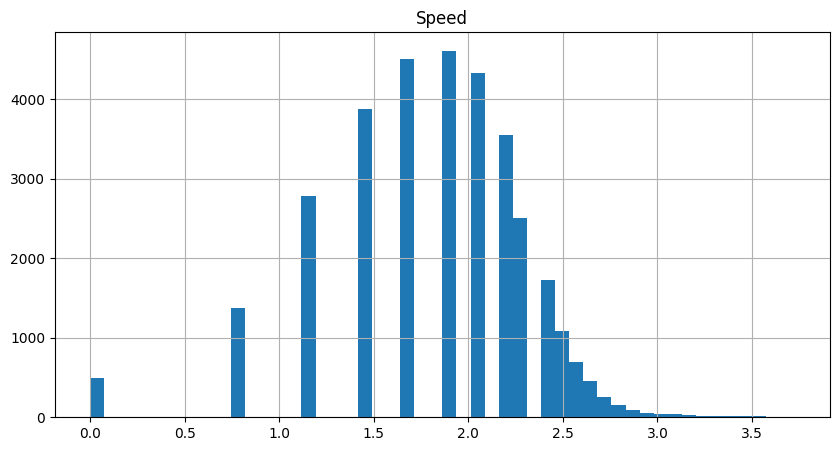

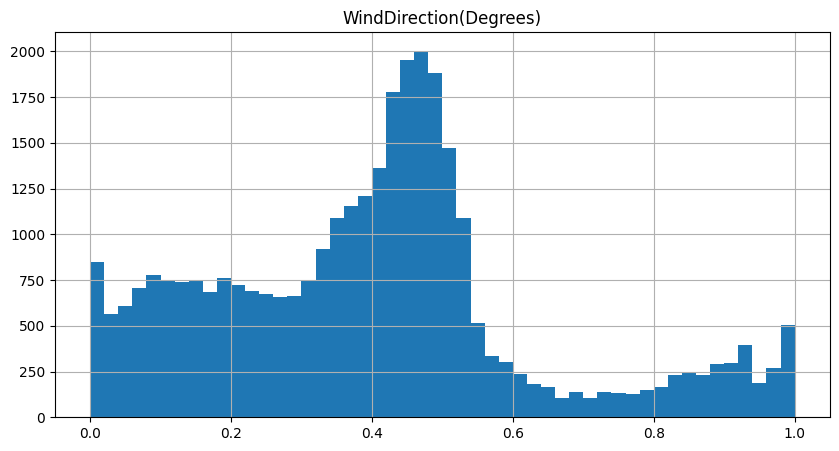

In [36]:
feature_to_transform = ['Temperature', 'Pressure', 'Humidity','Speed', 'WindDirection(Degrees)']
for feature in feature_to_transform:
    fig,(ax1) = plt.subplots(1,1,figsize = (10,5))
    pd.DataFrame(X_new[feature]).hist(ax=ax1,bins=50)


## <font color = 'green'>Train Test Split</font>

In [37]:
Xtrain , Xtest, ytrain, ytest = train_test_split(X_new,y,test_size=0.2,random_state=1)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [38]:
Xtrain.shape, Xtest.shape

((26148, 14), (6538, 14))

## <font color = 'green'>Predictions : XGBoost</font>

In [39]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [40]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

#hyperparameter tunning
def find_best_model_using_features(X,y):
    algos = {

        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'criterion' : [ 'poisson', 'squared_error', 'friedman_mse'],
                'max_depth':[4,8],
                'max_features' : ['sqrt','log2']
            }
        },
        'XGBoost':{
            'model': XGBRegressor(),
            'params':{
                'learning_rate':[0.1,0.05],
                'max_depth': [2,4,8],
            }
        }
    }
    
    scores = []
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'])
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model',"best_score",'best_params'])

        

In [41]:
find_best_model_using_features(Xtrain,ytrain)

,model,best_score,best_params
0,lasso,0.611069,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.876225,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,random_forest,0.863528,"{'criterion': 'squared_error', 'max_depth': 8,..."
3,XGBoost,0.935330,"{'learning_rate': 0.1, 'max_depth': 8}"


0        1.21
1        1.21
2        1.23
3        1.21
4        1.17
         ... 
32681    1.22
32682    1.17
32683    1.20
32684    1.23
32685    1.20
Name: Radiation, Length: 32686, dtype: float64

In [54]:
#hyperparameter 
params={
    'learning_rate':0.1,
    'max_depth':8
   
}

from xgboost import XGBRegressor
xgModel = XGBRegressor(**params)

#train the model|
xgModel.fit(Xtrain,ytrain)

#prediction
y_pred_xg = xgModel.predict(Xtest)

In [55]:
print('XGBoost model results: {0:0.2f}'.format(np.sqrt(mean_squared_error(y_pred_xg,ytest))))

XGBoost model results: 81.45


In [56]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred_xg))
r2 = r2_score(ytest, y_pred_xg)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 81.45
R2: 0.93


## <font color='green'>Prediction : Multilayer Perception</font>

In [51]:
Xtrain , Xtest, ytrain, ytest = train_test_split(X_new,y,test_size=0.2,random_state=1)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [52]:
model = None
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))
    
model.compile(metrics='mse', loss='mae', optimizer=Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [53]:
history = model.fit(Xtrain, ytrain, validation_split=0.1, epochs=50, batch_size=32)


Epoch 1/50
736/736 [==============================] - 3s 3ms/step - loss: 123.4402 - mse: 57155.1211 - val_loss: 79.9297 - val_mse: 23345.4922
Epoch 2/50
736/736 [==============================] - 2s 2ms/step - loss: 86.4345 - mse: 28150.2363 - val_loss: 70.4832 - val_mse: 19064.6934
Epoch 3/50
736/736 [==============================] - 2s 2ms/step - loss: 80.9599 - mse: 24990.2578 - val_loss: 66.4671 - val_mse: 17114.3887
Epoch 4/50
736/736 [==============================] - 2s 2ms/step - loss: 78.7287 - mse: 23495.2363 - val_loss: 65.5658 - val_mse: 16980.5273
Epoch 5/50
736/736 [==============================] - 2s 2ms/step - loss: 76.8331 - mse: 22731.0684 - val_loss: 60.8022 - val_mse: 14696.6592
Epoch 6/50
736/736 [==============================] - 2s 2ms/step - loss: 75.0047 - mse: 21566.8418 - val_loss: 59.8059 - val_mse: 14508.1270
Epoch 7/50
736/736 [==============================] - 2s 2ms/step - loss: 72.6325 - mse: 20666.3242 - val_loss: 56.8184 - val_mse: 13415.0947
Epoch

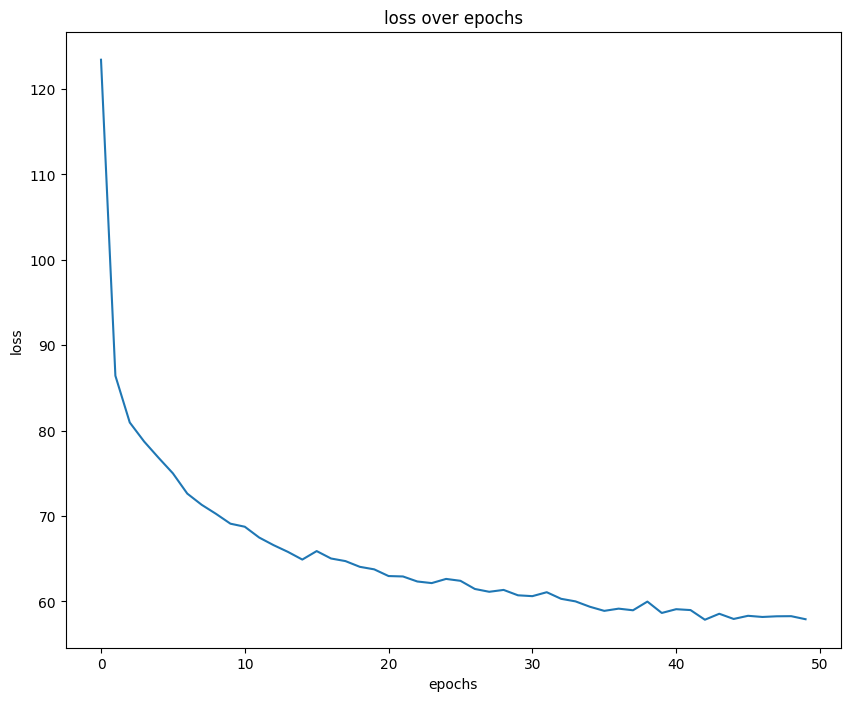

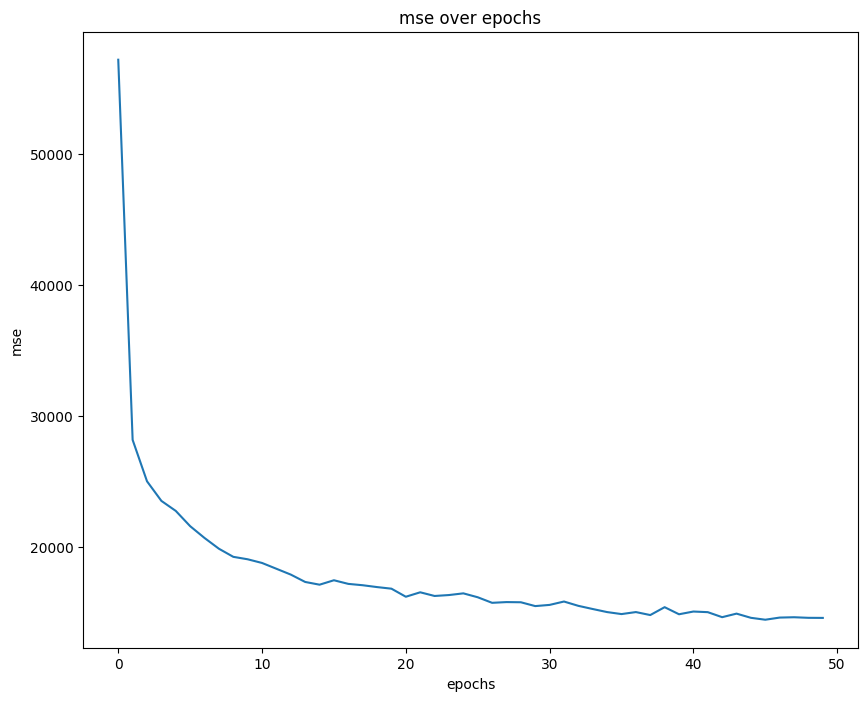

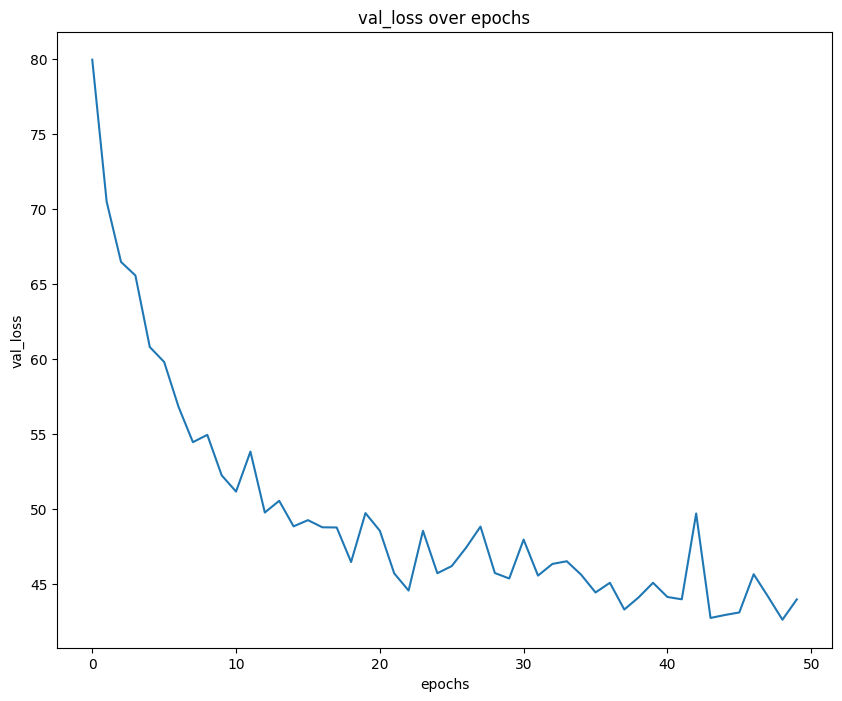

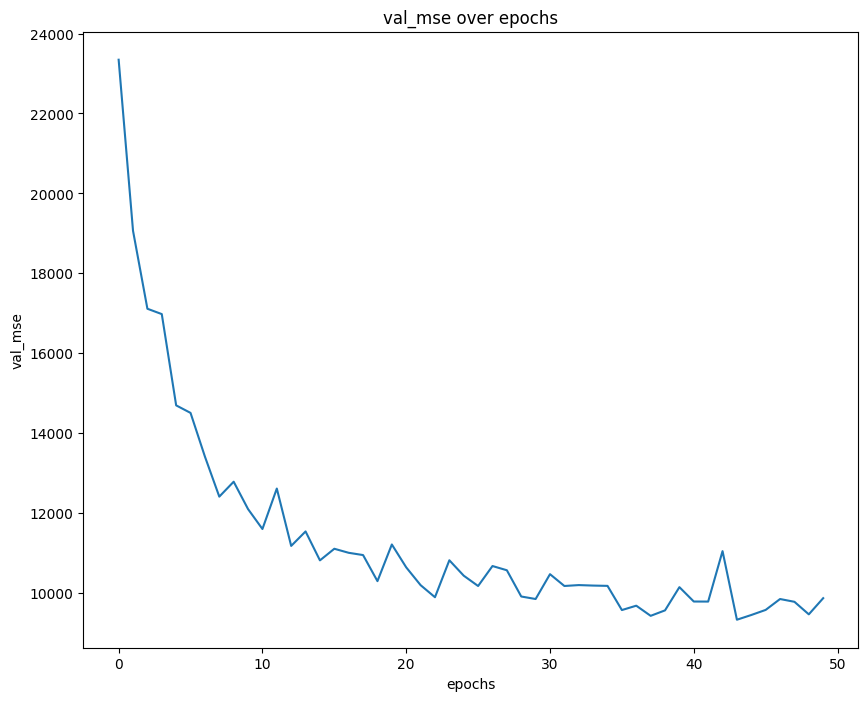

In [57]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [58]:
scores = model.evaluate(Xtest, ytest)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ', mae)

205/205 [==============================] - 0s 1ms/step - loss: 41.7963 - mse: 9835.5947
Mean absolute error:  41.79628372192383


In [59]:
mean_absolute_error(ytest, model.predict(Xtest))

205/205 [==============================] - 0s 1ms/step


41.79628440070058